In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('benchmarks.csv')

In [9]:
def plot_np_vs_latency(operation, msg_size, ax):
    df = df[df['Size'] == msg_size][df['Operation'] == operation]
    for alg in df['Algorithm'].unique():
        alg_df = df[df['Algorithm'] == alg].sort_values(by='Processes')
        ax.plot(alg_df['Processes'], alg_df['Avg_Latency'], label=alg)

    ax.set_xlabel('Processes')
    ax.set_ylabel('Avg Latency')
    ax.set_title(f'Latency vs Processes for Size {msg_size}')
    ax.set_xticks(range(2, max(df['Processes']) + 1, 2))
    ax.axvline(12, color='r', linestyle='--')
    ax.axvline(24, color='r', linestyle='--')
    ax.axvline(36, color='r', linestyle='--')
    ax.axvline(48, color='r', linestyle='--')
    ax.legend()

In [10]:
def plot_np_vs_latency(operation, msg_size, ax):
    filtered_df = df[(df['Size'] == msg_size) & (df['Operation'] == operation)]
    
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']

    for i, alg in enumerate(filtered_df['Algorithm'].unique()):
        alg_df = filtered_df[filtered_df['Algorithm'] == alg].sort_values(by='Processes')
        marker = markers[i % len(markers)]
        ax.plot(alg_df['Processes'], alg_df['Avg_Latency'], 
                label=alg, marker=marker, linewidth=2, markersize=4)
    
    ax.set_xlabel('Number of Processes', fontsize=12)
    ax.set_ylabel('Average Latency (ms)', fontsize=12)
    ax.set_title(f'Latency vs NP\n MSG Size: {msg_size}', fontsize=14)
    
    ax.set_xticks(range(2, max(filtered_df['Processes']) + 1, 2))
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    for vline in [12, 24, 36, 48]:
        ax.axvline(vline, color='g', linestyle=':', linewidth=1.5)
    
    ax.legend(loc='best', fontsize=10, shadow=True)

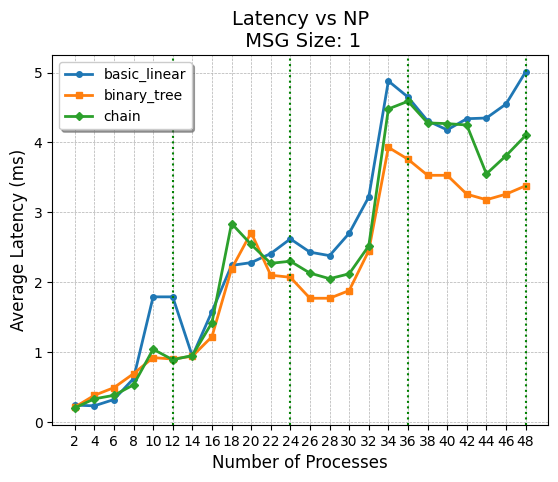

In [11]:
fig, ax = plt.subplots()
plot_np_vs_latency('bcast', 1, ax)
plt.show()

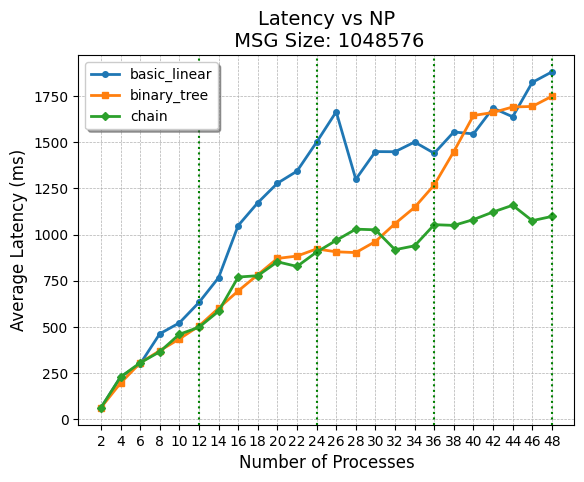

In [12]:
fig, ax = plt.subplots()
plot_np_vs_latency('bcast', 1024*1024, ax) # 1MB
plt.show()

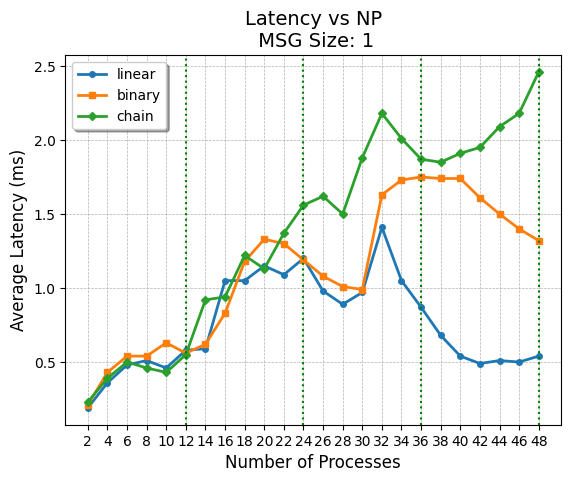

In [13]:
fig, ax = plt.subplots()
plot_np_vs_latency('reduce', 1, ax)
plt.show()

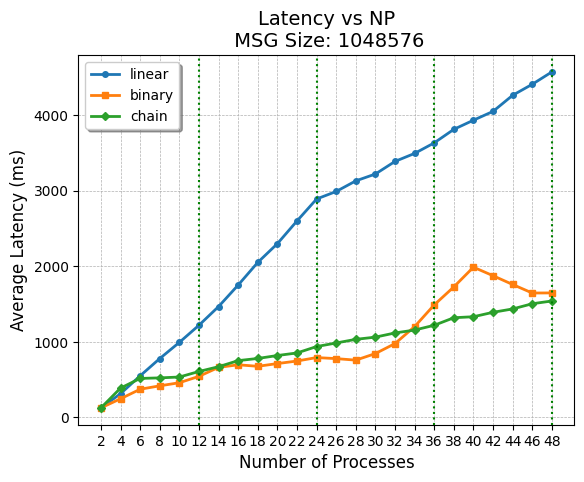

In [14]:
fig, ax = plt.subplots()
plot_np_vs_latency('reduce', 1024*1024, ax)
plt.show()